# Visualizing the History of Nobel Prize Winners

## Project Description
The Nobel Prize is awarded yearly to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace, with the first prize awarded in 1901. Are there any biases in the way the honors are awarded? Use your data manipulation and visualization skills to explore the history of this coveted prize.

## Project Instructions

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

* Store your answers as string variables ``top_gender`` and ``top_country``.

  
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

* Store this as an integer called ``max_decade_usa``.

  
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

* Store this as a dictionary called ``max_female_dict`` where the decade is the key and the category is the value. There should only be one key:value pair.

Who was the first woman to receive a Nobel Prize, and in what category?

* Save your string answers as ``first_woman_name`` and ``first_woman_category``.


Which individuals or organizations have won more than one Nobel Prize throughout the years?

* Store the full names in a list named ``repeat_list``.

## The Nobel Prize

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Understanding and Preparing the Data

The data is imported from the `nobel.csv` file.


In [2]:
df=pd.read_csv('./data/nobel.csv', 
            index_col=None, 
            header='infer')

To understand data, the `'head()'` and `'describe()'` (for both 'numeric' and 'object' types) methods will be used.

In [3]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


The following code provides a summary of the categorical columns in the DataFrame. This offers an initial overview of how non-numerical data is distributed and helps identify key trends and frequent values within the dataset.


In [4]:
df.describe(include='object')

,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
count,1000,1000,912,1000,1000,1000,968,964,969,970,736,735,735,596,579,585
unique,6,621,615,4,2,993,949,649,129,2,325,195,29,585,293,50
top,Medicine,The Sveriges Riksbank Prize in Economic Scienc...,"""for the discovery and synthesis of quantum dots""",1/1,Individual,Comité international de la Croix Rouge (Intern...,1918-08-13,"New York, NY",United States of America,Male,University of California,"Cambridge, MA",United States of America,1973-08-12,Paris,United States of America
freq,227,3,3,358,966,3,2,55,291,905,36,53,385,2,27,206


Based on the output, we can draw the following insights:

- **Category**: There are six distinct categories, with *Medicine* being the most common, appearing 227 times.
- **Prize**: The column contains 621 unique prize names. The most frequently mentioned is *The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel*, which appears three times.
- **Motivation**: There are 615 unique motivations. The most common one is *"for the discovery and synthesis of quantum dots"*, which appears three times.
- **Prize Share**: This column includes four unique values. The most common is `'1/1'`, indicating a sole recipient, which occurs 358 times.
- **Laureate Type**: Laureates are either individuals or organisations. *Individual* is by far the most common, with 966 entries.
- **Full Name**: There are 993 unique names. The most frequently occurring is *Comité international de la Croix Rouge (International Committee of the Red Cross)*, which appears three times.
- **Birth Information**: Common birthplaces show some concentration. *New York, NY* is the most frequent birth city, and the *United States of America* is the leading country of birth.
- **Sex**: The dataset is predominantly male, with 905 male laureates recorded.
- **Organisation Information**: The most commonly listed organisation is the *University of California*, appearing 36 times. *Cambridge, MA* is the most common organisation city, and the *United States of America* appears most frequently as the country.
- **Death Information**: Although these columns have more missing data, we can observe that *Paris* is the most common death city, and the *United States of America* is the most common country of death.

These summaries offer a helpful snapshot of the dataset’s structure and content, and will guide our deeper analysis.


The `.describe()` method is used to summarise the numerical columns in the DataFrame. It provides key statistics such as count, mean, standard deviation, minimum and maximum values, and quartiles. This helps us better understand the range and distribution of the numeric data.



In [5]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


The output provides summary statistics for the numerical columns `year` and `laureate_id`:

- **Year**: The data spans from 1901 to 2023. The average year is approximately 1973.72, with a standard deviation of 34.52, indicating a wide distribution over time.
- **Laureate ID**: IDs range from 1 to 1034, with an average value of 509.1. The standard deviation of 298.13 suggests a broad variation, which aligns with the dataset’s long historical coverage.

These statistics offer useful insights into the spread and central tendencies within the dataset’s numerical fields.


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

From the output of the `df.info()` method, we can gather the following insights:

- **Total Rows and Columns**: The DataFrame contains 1,000 entries and 18 columns.
- **Data Types**: There are 2 columns with integer types (`year`, `laureate_id`), while the remaining 16 are of type `object`, typically indicating categorical or text data.
- **Missing Values**:
  - **Motivation**: 912 non-null entries — 88 values are missing.
  - **Birth Information**: 
    - `birth_date`: 32 missing values
    - `birth_city`: 36 missing values
    - `birth_country`: 31 missing values
  - **Sex**: 30 missing values
  - **Organisation Information**:
    - `organization_name`: 264 missing values
    - `organization_city`: 265 missing values
    - `organization_country`: 265 missing values
  - **Death Information**:
    - `death_date`: 404 missing values
    - `death_city`: 421 missing values
    - `death_country`: 415 missing values
- **Memory Usage**: Approximately 140.8 KB

These details help identify which columns may require further cleaning or imputation due to missing data.



# Most Commonly Awarded **Gender** and **Country of Birth**

* Store your answers as string variables: `top_gender` and `top_country`.



In [7]:
top_gender=df['sex'].mode()[0]
print(f"The gender that has won the most Nobel Prizes is {top_gender}.")


The gender that has won the most Nobel Prizes is Male.


In [8]:
top_country=df['birth_country'].mode()[0]
print(f"The most common country of birth among the Nobel laureates is {top_country}.")

The most common country of birth among the Nobel laureates is United States of America.


### **Decade** with the Highest Ratio of US-born Nobel Prize Winners to Total Winners (All Categories)

* Store this as an integer variable named `max_decade_usa`.


To evaluate the decade with the highest ratio of US-born Nobel laureates to total laureates, we first need to group the `year` column into decades. The results will be stored in a new column.

In [9]:
# create a new column 'decade'
df['decades']=df['year']//10*10         

Next, we will define a function to calculate the ratio of a specific value within a given column, grouped by decade. This will allow us to determine the proportion of US-born laureates for each decade.


In [10]:
# Create a function for calculating a Dataframe with the ratio of the count of a categorical value to the total per decade
def ratio_per_decade(data, column,value):
    dec=[]
    ratios=[]
    for decade in data['decades'].unique():
        df_dec=data[data['decades']==decade]
        total=len(df_dec)
        value_list=len(df_dec[df_dec[column]==value])
        ratio=value_list/total
        dec.append(decade)
        ratios.append(ratio)
    return pd.DataFrame({'decades':dec,'ratios':ratios})

We’ll apply the function to the `birth_country` column, focusing on the value `'United States of America'`, to calculate its proportion by decade.


In [11]:
# use the function to get the series of the ratio of the 'birth_country'
usa_win_ratios=ratio_per_decade(df,'birth_country','United States of America')
# Get the max_ratio
max_ratio=float(usa_win_ratios['ratios'].max())
# Get the max_decade_usa
max_decade_usa=usa_win_ratios.iloc[usa_win_ratios['ratios'].idxmax(),0]

display(f"The decade with the highest ratio of USA Nobel laureates is {max_decade_usa} with a ratio of {max_ratio:.2f}.")

'The decade with the highest ratio of USA Nobel laureates is 2000 with a ratio of 0.42.'

We can now visualise the resulting ratios using the custom function, plotted over time to observe trends in US representation among Nobel laureates.


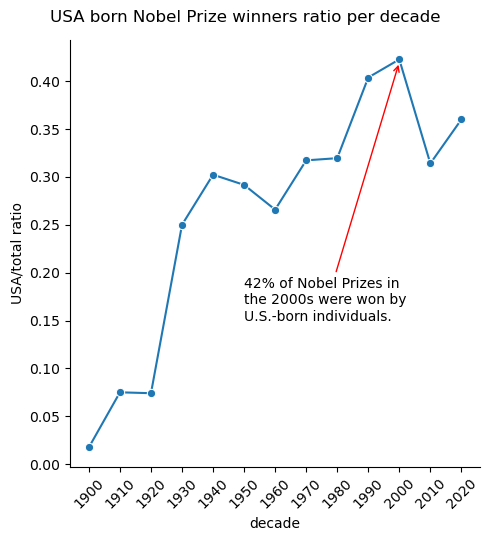

In [12]:
# Show the position of the maximum ratio of US born individuals
g=sns.relplot(x=usa_win_ratios.decades,y=usa_win_ratios.ratios,kind='line',marker='o')
title='USA born Nobel Prize winners ratio per decade'
g.fig.suptitle(title,y=1.03)
g.set(xlabel='decade',ylabel='USA/total ratio')
plt.xticks(ticks=range(1900,2021,10),rotation=45)
plt.annotate("42% of Nobel Prizes in \nthe 2000s were won by \nU.S.-born individuals.",xy=(2000,0.42),xytext=(1950,.15),arrowprops=dict(arrowstyle='->',color='red'))
plt.show()

### **Decade and Nobel Prize Category** Combination with the Highest Proportion of Female Laureates

* Store this as a dictionary called `max_female_dict`, where the decade is the key and the category is the*


First, let's review the available values for gender, category, and decade to understand the data we’ll be working with.


In [13]:
# Check the genders available
genders=df['sex'].unique()
print(genders)

['Male' 'Female' nan]


In [14]:
# Check Categories
categories=df['category'].unique()
print(categories)

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


In [15]:
# Check the decades
decades=df['decades'].unique()
print(decades)

[1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020]


Next, we’ll filter the `df` DataFrame to include only rows where the laureate's sex is `'Female'` — A new column named 'XX' will be added to be able to filter the *women* or *not-women* rows.


In [16]:
# Filter for Female winners
df['XX']=df['sex']=='Female'

We then group the filtered DataFrame by both `decade` and `category`, and calculate the mean. This will give us the proportion of female laureates within each group.


In [17]:
# Groupby decades and Category
df_filter=df.groupby(['decades','category'],as_index=False)['XX'].mean()

Let’s plot the proportion of female Nobel Prize winners over time, using separate lines for each category to compare trends across decades.


In [18]:
# Find the decade and category with the highest female winners
df_max = df_filter[df_filter['XX'] == df_filter['XX'].max()][['decades', 'category']]

# Accessing the values correctly
max_decade = df_max['decades'].values[0]
category = df_max['category'].values[0]

print(f"The highest female ratio occurred in the {max_decade}s for the {category} category.")


The highest female ratio occurred in the 2020s for the Literature category.


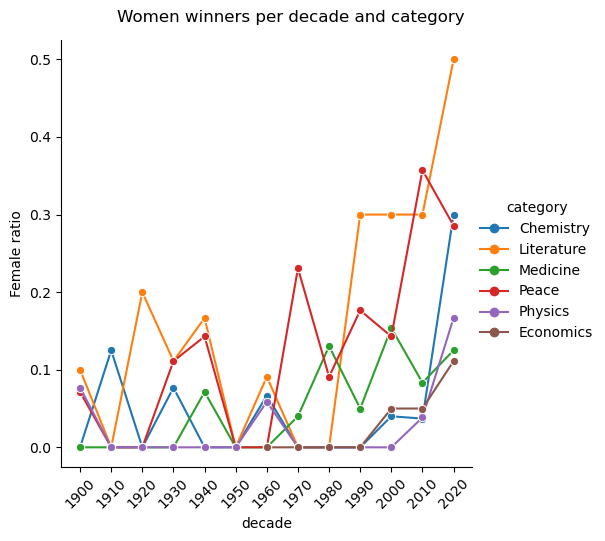

In [19]:
g=sns.relplot(data=df_filter,x='decades',y='XX',hue='category',kind='line',marker='o')
title='Women winners per decade and category'
g.fig.suptitle(title,y=1.03)
g.set(xlabel='decade',ylabel='Female ratio',)
plt.xticks(ticks=range(1900,2021,10),rotation=45)
plt.show()

### Who Was the **First Woman** to Receive a Nobel Prize, and in Which **Category**?

* Save your answers as string variables: `first_woman_name` and `first_woman_category`.


In [20]:
# filter the df_XX to only women, and getting the index of the minimum year (i.e. the first year a woman gets the Nobel)
min_index=df[df['XX']]['year'].idxmin()

In [21]:
# with that index get the name and the category
first_woman_name = df.iloc[min_index]['full_name']
first_woman_category = df.iloc[min_index]['category']
first_year=df.iloc[min_index]['year']
print(f"The first woman laureate was {first_woman_name} in {first_woman_category} in {first_year}")

The first woman laureate was Marie Curie, née Sklodowska in Physics in 1903


### Which Individuals or Organisations Have Won **More Than One Nobel Prize**?

* Store the full names in a list named `repeat_list`.


To identify individuals or organisations that have received more than one Nobel Prize, we’ll count the number of occurrences per name and filter for those with more than one entry.


In [22]:
repeaters=df['full_name'].value_counts()
repeat_list=list(repeaters[repeaters>1].index)
print(repeaters[repeaters>1])

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64


## Key Findings

- The most frequently awarded gender is male, and the most common country of birth is the United States.
- The decade with the highest proportion of US-born laureates was the 2000s.
- Female representation in the Nobel Prizes has increased slightly over time, with notable peaks in certain categories.
- A few individuals and organisations, like Marie Curie and the Red Cross, have received the Nobel Prize more than once.


## Conclusion

Through this analysis, we've explored over a century of Nobel Prize history to uncover patterns in gender, nationality, and institutional recognition. By examining trends across decades and categories, we've gained insights into the evolving landscape of global achievements. This exploration not only highlights notable individuals and repeated winners, but also reveals broader societal shifts in who gets recognised — and when.

There’s still more to discover in this dataset, so feel free to continue digging into the data to uncover even deeper stories behind the prize.
